In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
cols = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'class']
df = pd.read_csv('seeds_dataset.txt', names=cols, sep='\s+')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Randy\AppData\Local\Temp\ipykernel_10908\747616905.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('seeds_dataset.txt', names=cols, sep='\s+')


,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


We are Trying to Cluster the different Varieties of Wheat

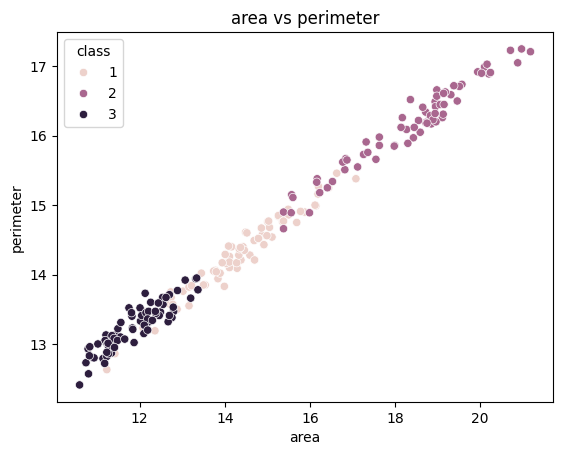

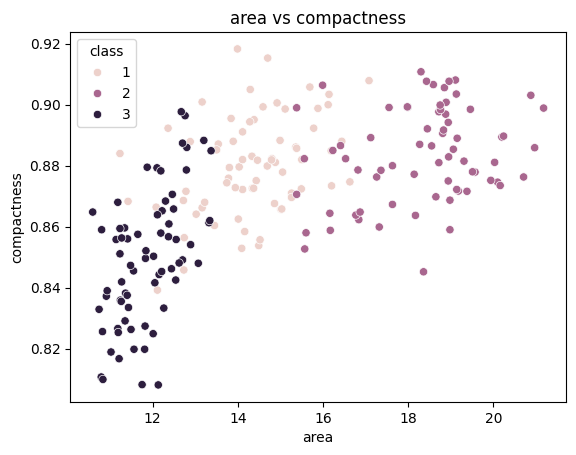

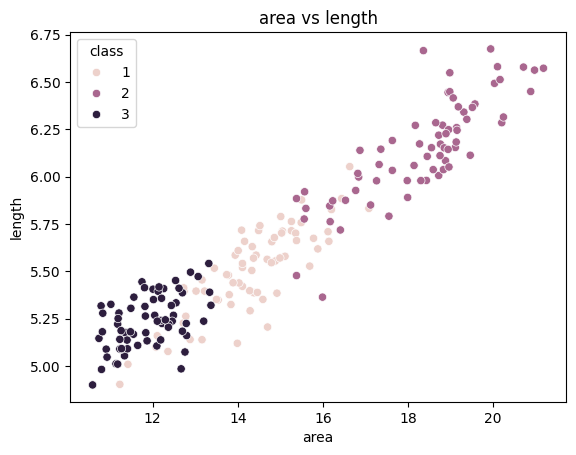

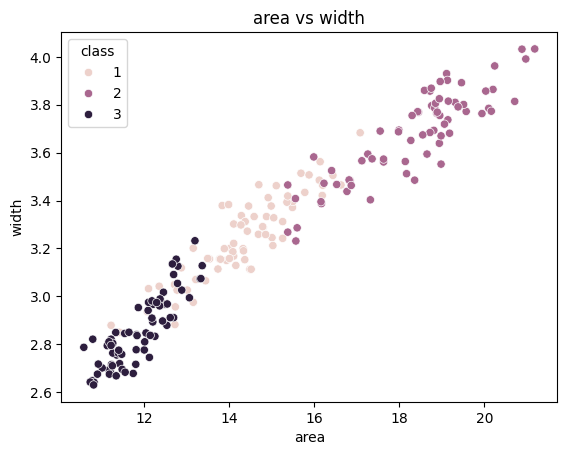

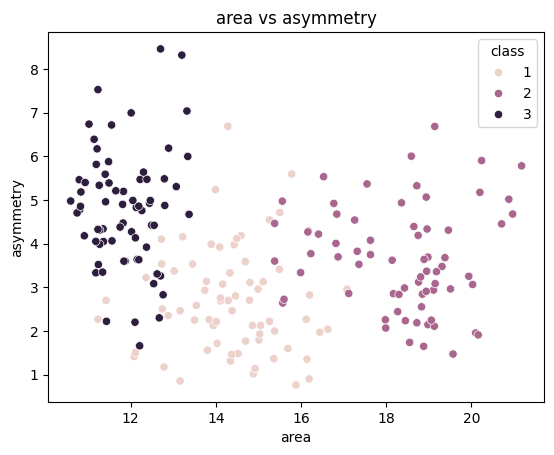

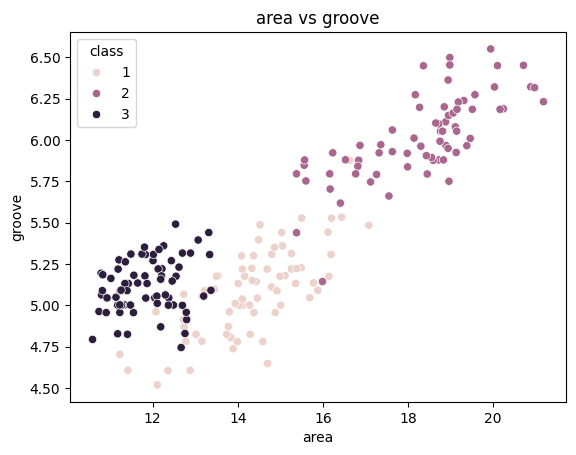

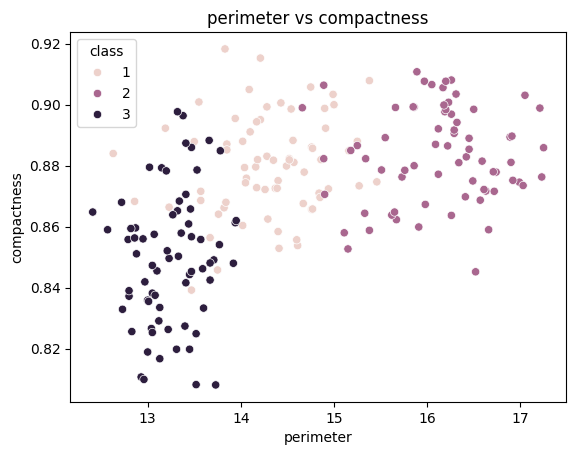

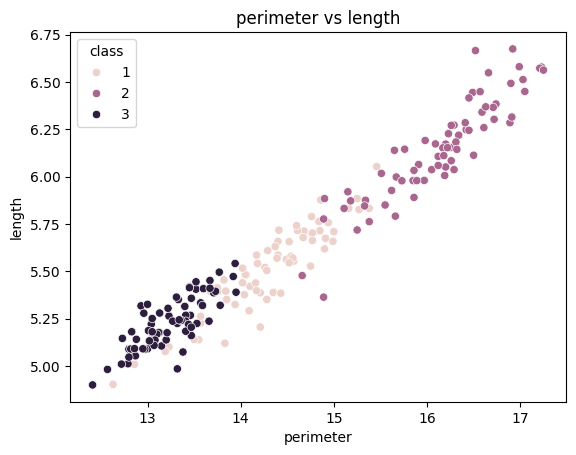

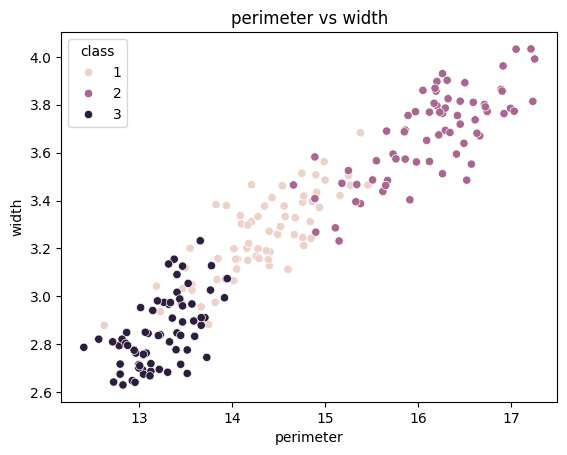

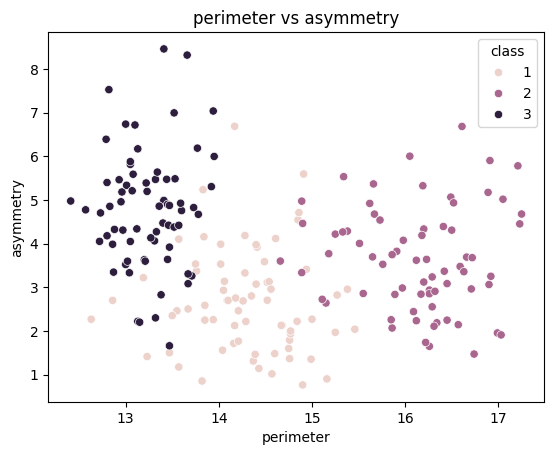

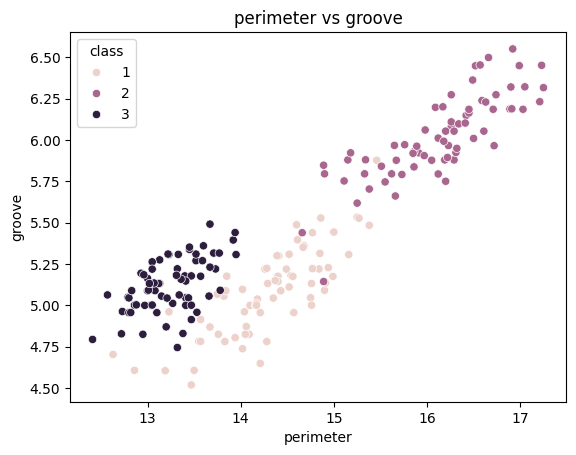

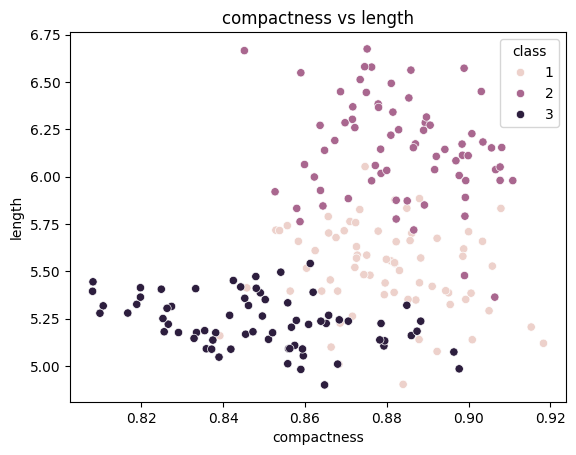

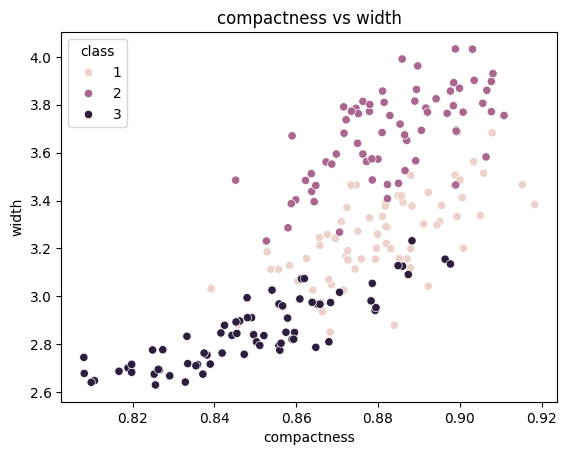

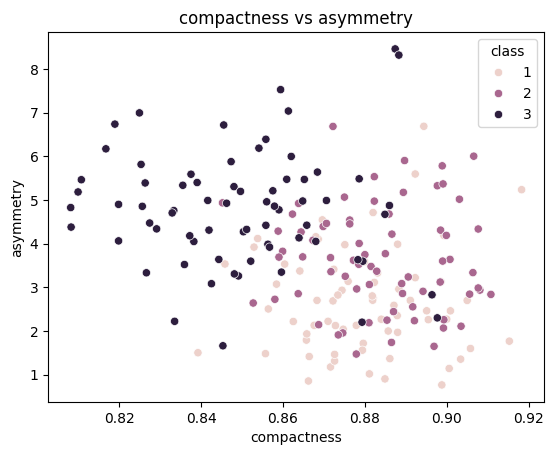

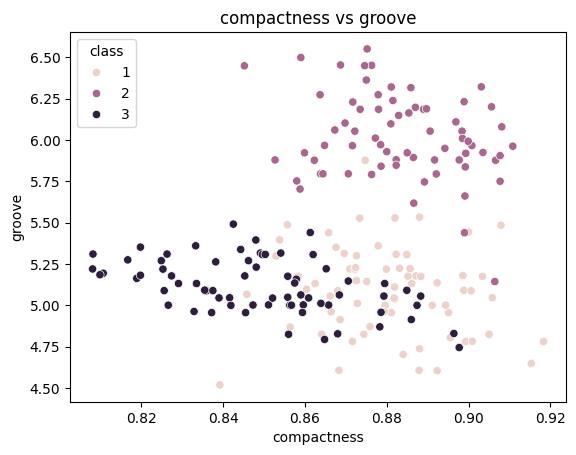

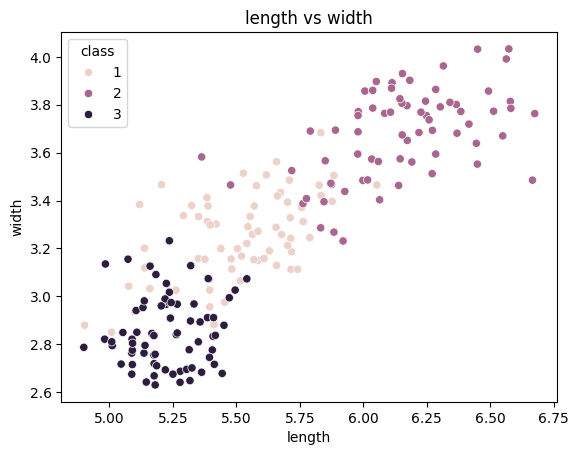

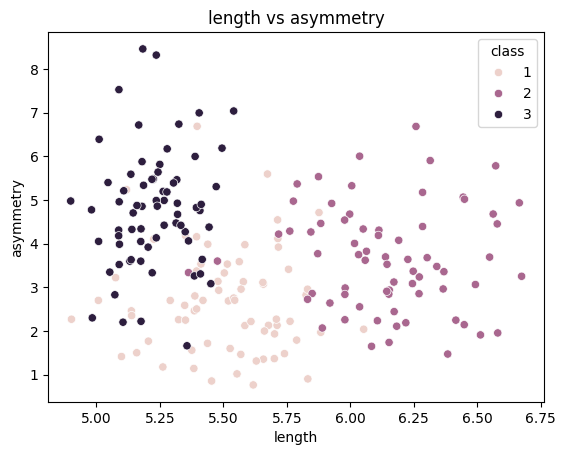

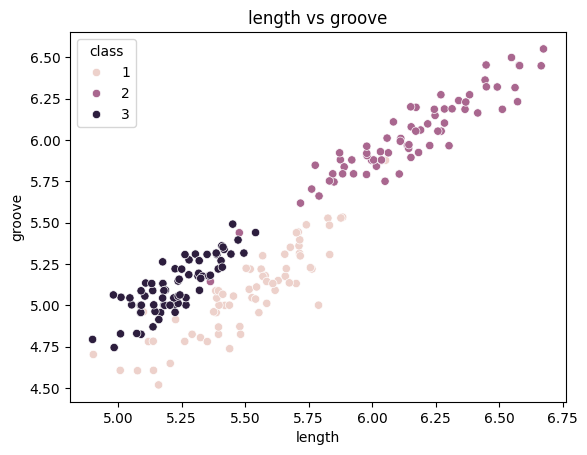

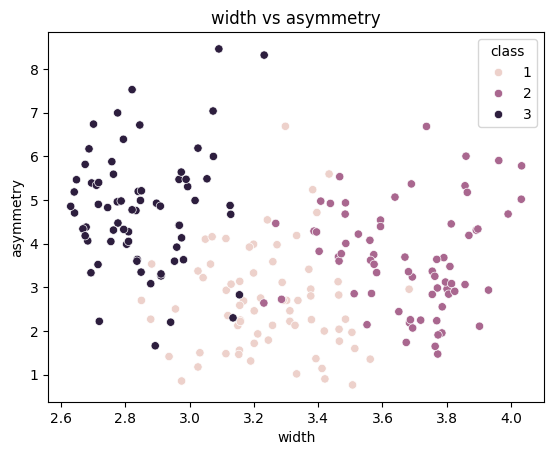

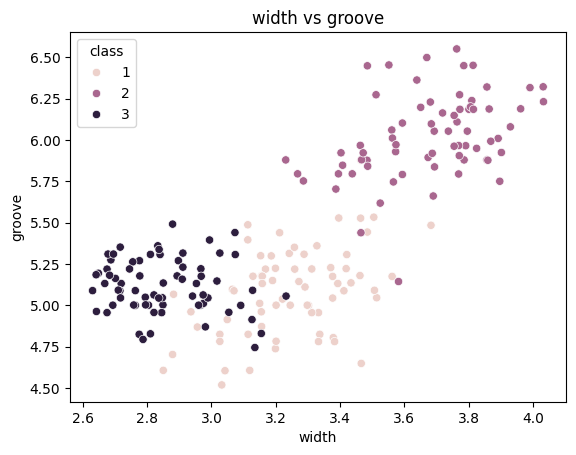

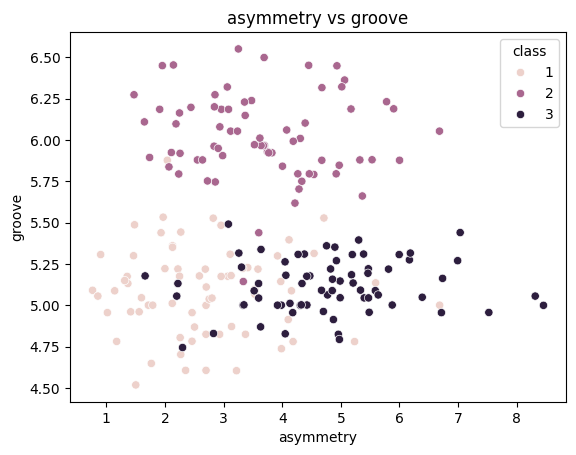

In [10]:
'''Outer Loop (for i in range(len(cols)-1)):
    This loop iterates over the columns of the dataframe.
    len(cols)-1 ensures that the loop goes up to the second last column index. 
    The reason for this is to avoid pairing the last column with itself (which is already managed by the inner loop).
    
    Inner Loop (for j in range(i+1, len(cols)-1)):
    This loop iterates over the columns starting from the next column index after the current index of the outer loop.
    i+1 ensures that we do not pair a column with itself and only consider unique pairs.
    len(cols)-1 again ensures that we stop at the second last column index.
    '''

''' x_label is set to the column at index i.
    y_label is set to the column at index j.
    This ensures that we have a unique pair of columns for each iteration of the loops'''

for i in range(len(cols)-1): #columns
    for j in range(i+1, len(cols)-1): #combinations
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
        plt.title(f'{x_label} vs {y_label}')
        plt.show()

Clustering

In [13]:
from sklearn.cluster import KMeans

In [11]:
x = 'perimeter'
y = 'asymmetry'
X = df[[x,y]].values # values of two columns(in an array)

In [29]:
#Creating the k-means model
Kmeans = KMeans(n_clusters=3).fit(X)
clusters = Kmeans.labels_
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=[x, y, 'class'])
cluster_df

,perimeter,asymmetry,class
0,14.84,2.221,0.0
1,14.57,1.018,0.0
2,14.09,2.699,0.0
3,13.94,2.259,0.0
4,14.99,1.355,0.0
...,...,...,...
205,13.20,3.631,0.0
206,12.88,4.325,2.0
207,13.66,8.315,2.0
208,13.21,3.598,0.0


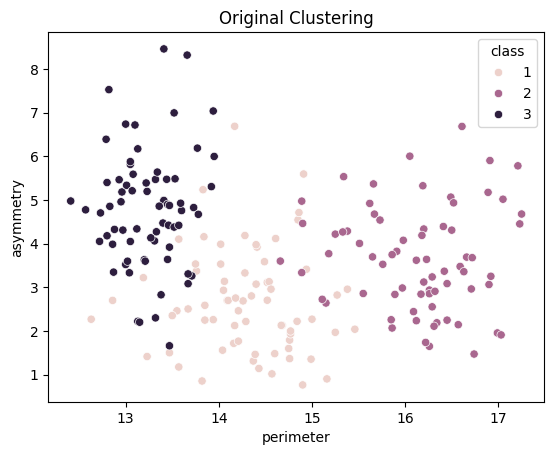

In [31]:
#Original Classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.title('Original Clustering')
plt.show()

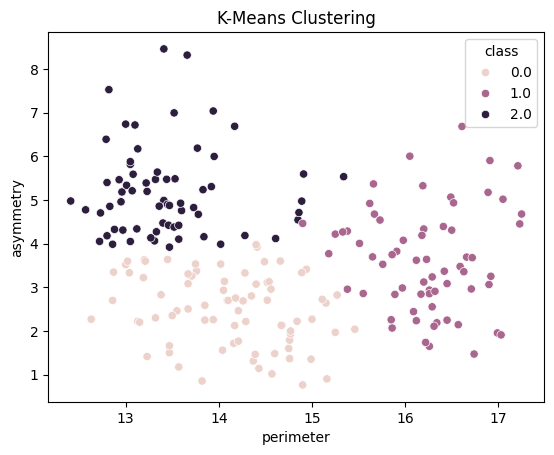

In [30]:
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.title('K-Means Clustering')
plt.show()

In [ ]:
#compare it with the ones we have in the dataset
df['class'].values

For Higher Dimensions

In [43]:
#get values of all columns except the last one
X = df[cols[:-1]].values
Kmeans = KMeans(n_clusters=3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=df.columns)

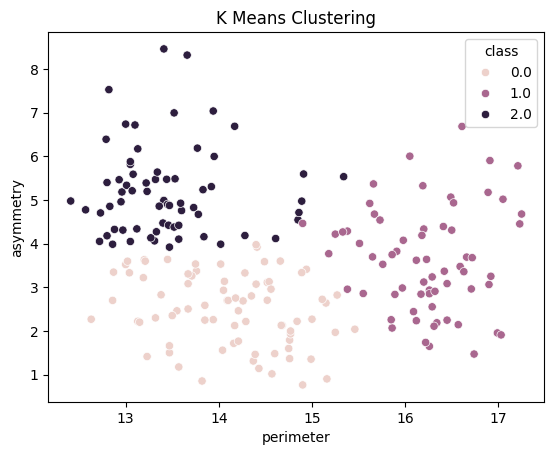

In [44]:
#K Means classes
sns.scatterplot(x=x,y=y, hue='class', data=cluster_df)
plt.title('K Means Clustering')
plt.show()

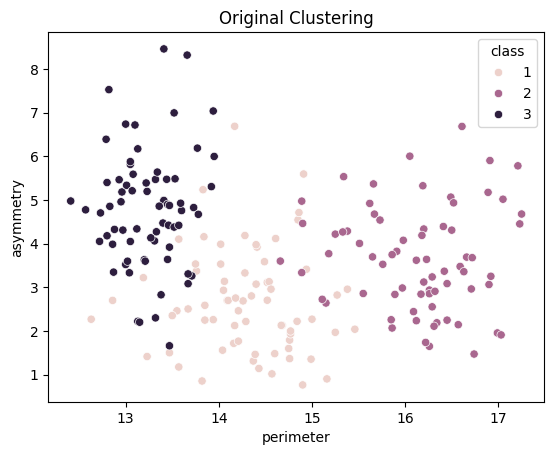

In [45]:
#Original Classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.title('Original Clustering')
plt.show()

Principle Component Analysis

In [47]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)
print(X.shape)
transformed_x.shape #means that there are two dimensions that im plotting

(210, 7)


(210, 2)

In [52]:
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

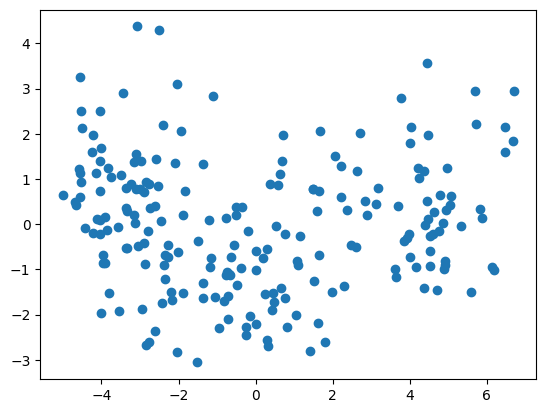

In [54]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [56]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, Kmeans.labels_.reshape(-1,1))), columns=['pca1', 'pca2', 'class'])

In [57]:
true_pca_df = pd.DataFrame(np.hstack((transformed_x, df['class'].values.reshape(-1,1))), columns=['pca1', 'pca2', 'class'])

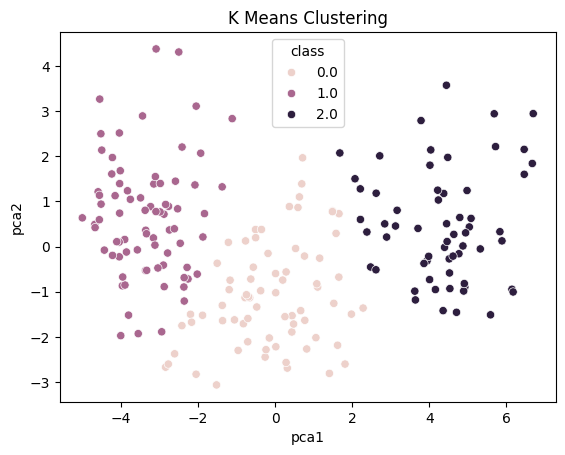

In [58]:
#K Means classes
sns.scatterplot(x='pca1',y='pca2', hue='class', data=kmeans_pca_df)
plt.title('K Means Clustering')
plt.show()

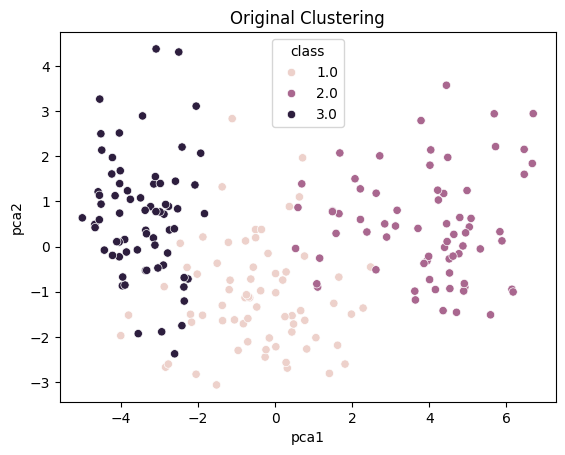

In [59]:
#Original Classes
sns.scatterplot(x='pca1', y='pca2', hue='class', data=true_pca_df)
plt.title('Original Clustering')
plt.show()